In [28]:
import os
import sys
import cv2
import warnings
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Add the root folder to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Summary files paths
base_path = "/app"
revealing_path = os.path.join(base_path, "output/reveal/CFD/revealing_summary.csv")
transformations_path = os.path.join(base_path, "data/processed/CFD/transformations_summary.csv")
hiding_path = os.path.join(base_path, "data/processed/CFD/hiding_summary.csv")

In [4]:
# Convertir la columna de métricas de string a diccionario
def parse_metrics(metrics):
    return eval(metrics) if isinstance(metrics, str) else metrics

In [5]:
# Add the root folder to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
from core.metrics import Metrics

# 1. Steguz

In [6]:
# load csv files
df_revealing = pd.read_csv(revealing_path)
df_transformations = pd.read_csv(transformations_path)
df_hiding = pd.read_csv(hiding_path)

In [7]:
# parse the metrics
df_revealing['metrics'] = df_revealing['metrics'].apply(parse_metrics)
df_transformations['metrics'] = df_transformations['metrics'].apply(parse_metrics)
df_hiding['metrics'] = df_hiding['metrics'].apply(parse_metrics)

In [8]:
# Expand metrics to columns
df_revealing = pd.concat([df_revealing.drop(columns=['metrics']), df_revealing['metrics'].apply(pd.Series)], axis=1)
df_transformations = pd.concat([df_transformations.drop(columns=['metrics']), df_transformations['metrics'].apply(pd.Series)], axis=1)
df_hiding = pd.concat([df_hiding.drop(columns=['metrics']), df_hiding['metrics'].apply(pd.Series)], axis=1)

In [9]:
df_hiding

,dataset,model,input_image,output_image,metadata,ssim,mse,psnr
0,CFD,steguz,/app/data/processed/CFD/CFD_original/AF-200/CF...,/app/data/processed/CFD/CFD_steguz/stego/AF-20...,"{'min_values': -0.021047208, 'max_values': 1.0...",0.927276,140.687653,26.648244
1,CFD,steguz,/app/data/processed/CFD/CFD_original/AF-201/CF...,/app/data/processed/CFD/CFD_steguz/stego/AF-20...,"{'min_values': -0.025484487, 'max_values': 1.0...",0.930781,91.517611,28.515757
2,CFD,steguz,/app/data/processed/CFD/CFD_original/AF-202/CF...,/app/data/processed/CFD/CFD_steguz/stego/AF-20...,"{'min_values': -0.013866425, 'max_values': 1.0...",0.932684,114.085639,27.558494
3,CFD,steguz,/app/data/processed/CFD/CFD_original/AF-203/CF...,/app/data/processed/CFD/CFD_steguz/stego/AF-20...,"{'min_values': -0.028959488, 'max_values': 1.0...",0.930949,130.206905,26.984463
4,CFD,steguz,/app/data/processed/CFD/CFD_original/AF-204/CF...,/app/data/processed/CFD/CFD_steguz/stego/AF-20...,"{'min_values': -0.014966574, 'max_values': 1.0...",0.923985,124.073534,27.194012
...,...,...,...,...,...,...,...,...
1436,CFD,steguz,/app/data/processed/CFD/CFD_original/WM-254/CF...,/app/data/processed/CFD/CFD_steguz/stego/WM-25...,"{'min_values': 0.0031278674, 'max_values': 1.0...",0.926873,142.962446,26.578584
1437,CFD,steguz,/app/data/processed/CFD/CFD_original/WM-255/CF...,/app/data/processed/CFD/CFD_steguz/stego/WM-25...,"{'min_values': 0.012498613, 'max_values': 1.05...",0.923088,140.988102,26.638979
1438,CFD,steguz,/app/data/processed/CFD/CFD_original/WM-256/CF...,/app/data/processed/CFD/CFD_steguz/stego/WM-25...,"{'min_values': 0.055242747, 'max_values': 1.05...",0.902582,222.067795,24.665948
1439,CFD,steguz,/app/data/processed/CFD/CFD_original/WM-257/CF...,/app/data/processed/CFD/CFD_steguz/stego/WM-25...,"{'min_values': 0.024101138, 'max_values': 1.06...",0.915504,183.758709,25.488324


In [10]:
df_transformations

,dataset,input_image,output_image,transformation,variant,parameters,model,metadata,status,ssim,mse,psnr
0,CFD,/app/data/processed/CFD/CFD_steguz/stego/AF-24...,/app/data/processed/CFD/CFD_steguz/transformat...,resize,resize_1,{'scale': 0.999},steguz,"{'min_values': -0.026680473, 'max_values': 1.0...",Success,0.975208,3.889170,42.232234
1,CFD,/app/data/processed/CFD/CFD_steguz/stego/AM-21...,/app/data/processed/CFD/CFD_steguz/transformat...,resize,resize_1,{'scale': 0.999},steguz,"{'min_values': -0.007901963, 'max_values': 1.0...",Success,0.971930,4.457676,41.639719
2,CFD,/app/data/processed/CFD/CFD_steguz/stego/BF-04...,/app/data/processed/CFD/CFD_steguz/transformat...,resize,resize_1,{'scale': 0.999},steguz,"{'min_values': 0.031073742, 'max_values': 1.05...",Success,0.972938,5.139569,41.021537
3,CFD,/app/data/processed/CFD/CFD_steguz/stego/BF-04...,/app/data/processed/CFD/CFD_steguz/transformat...,resize,resize_1,{'scale': 0.999},steguz,"{'min_values': -0.016749386, 'max_values': 1.0...",Success,0.974113,4.643807,41.462062
4,CFD,/app/data/processed/CFD/CFD_steguz/stego/BF-05...,/app/data/processed/CFD/CFD_steguz/transformat...,resize,resize_1,{'scale': 0.999},steguz,"{'min_values': -0.0034292005, 'max_values': 1....",Success,0.975570,5.283642,40.901470
...,...,...,...,...,...,...,...,...,...,...,...,...
69163,CFD,/app/data/processed/CFD/CFD_steguz/stego/WM-04...,/app/data/processed/CFD/CFD_steguz/transformat...,gaussian_blur,gaussian_blur_4,{'ksize': 9},steguz,"{'min_values': 0.0404625, 'max_values': 1.056276}",Success,0.833666,75.836157,29.332040
69164,CFD,/app/data/processed/CFD/CFD_steguz/stego/WM-04...,/app/data/processed/CFD/CFD_steguz/transformat...,median_blur,median_blur_1,{'ksize': 3},steguz,"{'min_values': 0.0404625, 'max_values': 1.056276}",Success,0.891710,17.782858,35.630788
69165,CFD,/app/data/processed/CFD/CFD_steguz/stego/WM-04...,/app/data/processed/CFD/CFD_steguz/transformat...,median_blur,median_blur_2,{'ksize': 5},steguz,"{'min_values': 0.0404625, 'max_values': 1.056276}",Success,0.873768,27.632235,33.716644
69166,CFD,/app/data/processed/CFD/CFD_steguz/stego/WM-04...,/app/data/processed/CFD/CFD_steguz/transformat...,median_blur,median_blur_3,{'ksize': 7},steguz,"{'min_values': 0.0404625, 'max_values': 1.056276}",Success,0.839273,39.901912,32.120867


In [11]:
df_revealing

,dataset,model,input_image,output_image,ssim,mse,psnr
0,CFD,steguz,/app/data/processed/CFD/CFD_steguz/stego/AF-20...,/app/output/reveal/CFD/CFD_steguz/stego/AF-200...,0.937089,96.959868,28.264883
1,CFD,steguz,/app/data/processed/CFD/CFD_steguz/stego/AF-20...,/app/output/reveal/CFD/CFD_steguz/stego/AF-201...,0.937254,93.973713,28.400740
2,CFD,steguz,/app/data/processed/CFD/CFD_steguz/stego/AF-20...,/app/output/reveal/CFD/CFD_steguz/stego/AF-202...,0.938976,100.258297,28.119600
3,CFD,steguz,/app/data/processed/CFD/CFD_steguz/stego/AF-20...,/app/output/reveal/CFD/CFD_steguz/stego/AF-203...,0.937989,98.886234,28.179445
4,CFD,steguz,/app/data/processed/CFD/CFD_steguz/stego/AF-20...,/app/output/reveal/CFD/CFD_steguz/stego/AF-204...,0.938228,101.805917,28.053073
...,...,...,...,...,...,...,...
70604,CFD,steguz,/app/data/processed/CFD/CFD_steguz/transformat...,/app/output/reveal/CFD/CFD_steguz/transformati...,0.365124,9572.922440,8.320358
70605,CFD,steguz,/app/data/processed/CFD/CFD_steguz/transformat...,/app/output/reveal/CFD/CFD_steguz/transformati...,0.357664,9734.544929,8.247647
70606,CFD,steguz,/app/data/processed/CFD/CFD_steguz/transformat...,/app/output/reveal/CFD/CFD_steguz/transformati...,0.358385,9736.993284,8.246555
70607,CFD,steguz,/app/data/processed/CFD/CFD_steguz/transformat...,/app/output/reveal/CFD/CFD_steguz/transformati...,0.364170,9556.746599,8.327703


## Hiding performance (Original image vs Stego Image)

In [12]:
# Hiding performance using steguz
summary_hiding = df_hiding[['ssim', 'mse', 'psnr']].agg(['mean', 'std'])
summary_hiding

,ssim,mse,psnr
mean,0.926896,125.474822,27.285345
std,0.008978,33.002542,1.097816


## Transformation effects (Stego image vs Transformed stego image)

In [20]:
mapping_dict = df_transformations[['variant', 'parameters']].drop_duplicates().set_index('variant')['parameters'].to_dict()

In [41]:
# Effect of the transformations and their impact on the stego images
summary_transformations = df_transformations.groupby(['transformation', 'parameters'])[['ssim', 'mse', 'psnr']].agg(['mean', 'std'])
summary_transformations

ssim  \
                                                                    mean   
transformation    parameters                                               
compression       {'compression_type': 'JPEG', 'quality': 100}  0.929482   
                  {'compression_type': 'JPEG', 'quality': 80}   0.905628   
                  {'compression_type': 'JPEG', 'quality': 90}   0.914533   
                  {'compression_type': 'JPEG', 'quality': 99}   0.927720   
                  {'compression_type': 'WebP', 'quality': 100}  0.926792   
                  {'compression_type': 'WebP', 'quality': 80}   0.903358   
                  {'compression_type': 'WebP', 'quality': 90}   0.916537   
                  {'compression_type': 'WebP', 'quality': 99}   0.926460   
gaussian_blur     {'ksize': 3}                                  0.914841   
                  {'ksize': 5}                                  0.890771   
                  {'ksize': 7}                                  0.862477   
                  {'ksize': 9}                                  0.842246   
gaussian_noise    {'mean': 0, 'sigma': 10}                      0.616309   
                  {'mean': 0, 'sigma': 16}                      0.446667   
                  {'mean': 0, 'sigma': 25}                      0.305714   
                  {'mean': 0, 'sigma': 2}                       0.967002   
                  {'mean': 0, 'sigma': 32}                      0.241496   
                  {'mean': 0, 'sigma': 4}                       0.885997   
                  {'mean': 0, 'sigma': 6}                       0.788001   
                  {'mean': 0, 'sigma': 8}                       0.695686   
median_blur       {'ksize': 3}                                  0.902537   
                  {'ksize': 5}                                  0.880711   
                  {'ksize': 7}                                  0.844166   
                  {'ksize': 9}                                  0.821236   
resize            {'scale': 0.5}                                0.901601   
                  {'scale': 0.65}                               0.920673   
                  {'scale': 0.75}                               0.932349   
                  {'scale': 0.85}                               0.944123   
                  {'scale': 0.95}                               0.960101   
                  {'scale': 0.975}                              0.966270   
                  {'scale': 0.999}                              0.974343   
                  {'scale': 0.9}                                0.951199   
salt_pepper_noise {'salt_prob': 0.01, 'pepper_prob': 0.01}      0.647608   
                  {'salt_prob': 0.01, 'pepper_prob': 0.3}       0.111786   
                  {'salt_prob': 0.03, 'pepper_prob': 0.03}      0.323254   
                  {'salt_prob': 0.03, 'pepper_prob': 0.1}       0.154778   
                  {'salt_prob': 0.1, 'pepper_prob': 0.03}       0.221657   
                  {'salt_prob': 0.1, 'pepper_prob': 0.1}        0.102600   
                  {'salt_prob': 0.3, 'pepper_prob': 0.01}       0.264135   
                  {'salt_prob': 0.3, 'pepper_prob': 0.3}        0.038904   
sharpening        {'intensity': 0.001}                          0.522142   
                  {'intensity': 0.01}                           0.528711   
                  {'intensity': 0.05}                           0.584804   
                  {'intensity': 0.1}                            0.664591   
                  {'intensity': 0.5}                            0.686120   
                  {'intensity': 0.75}                           0.671898   
                  {'intensity': 0}                              0.522142   
                  {'intensity': 1}                              0.655739   

                                                                          \
                                                                     std   
transformation    parameters           

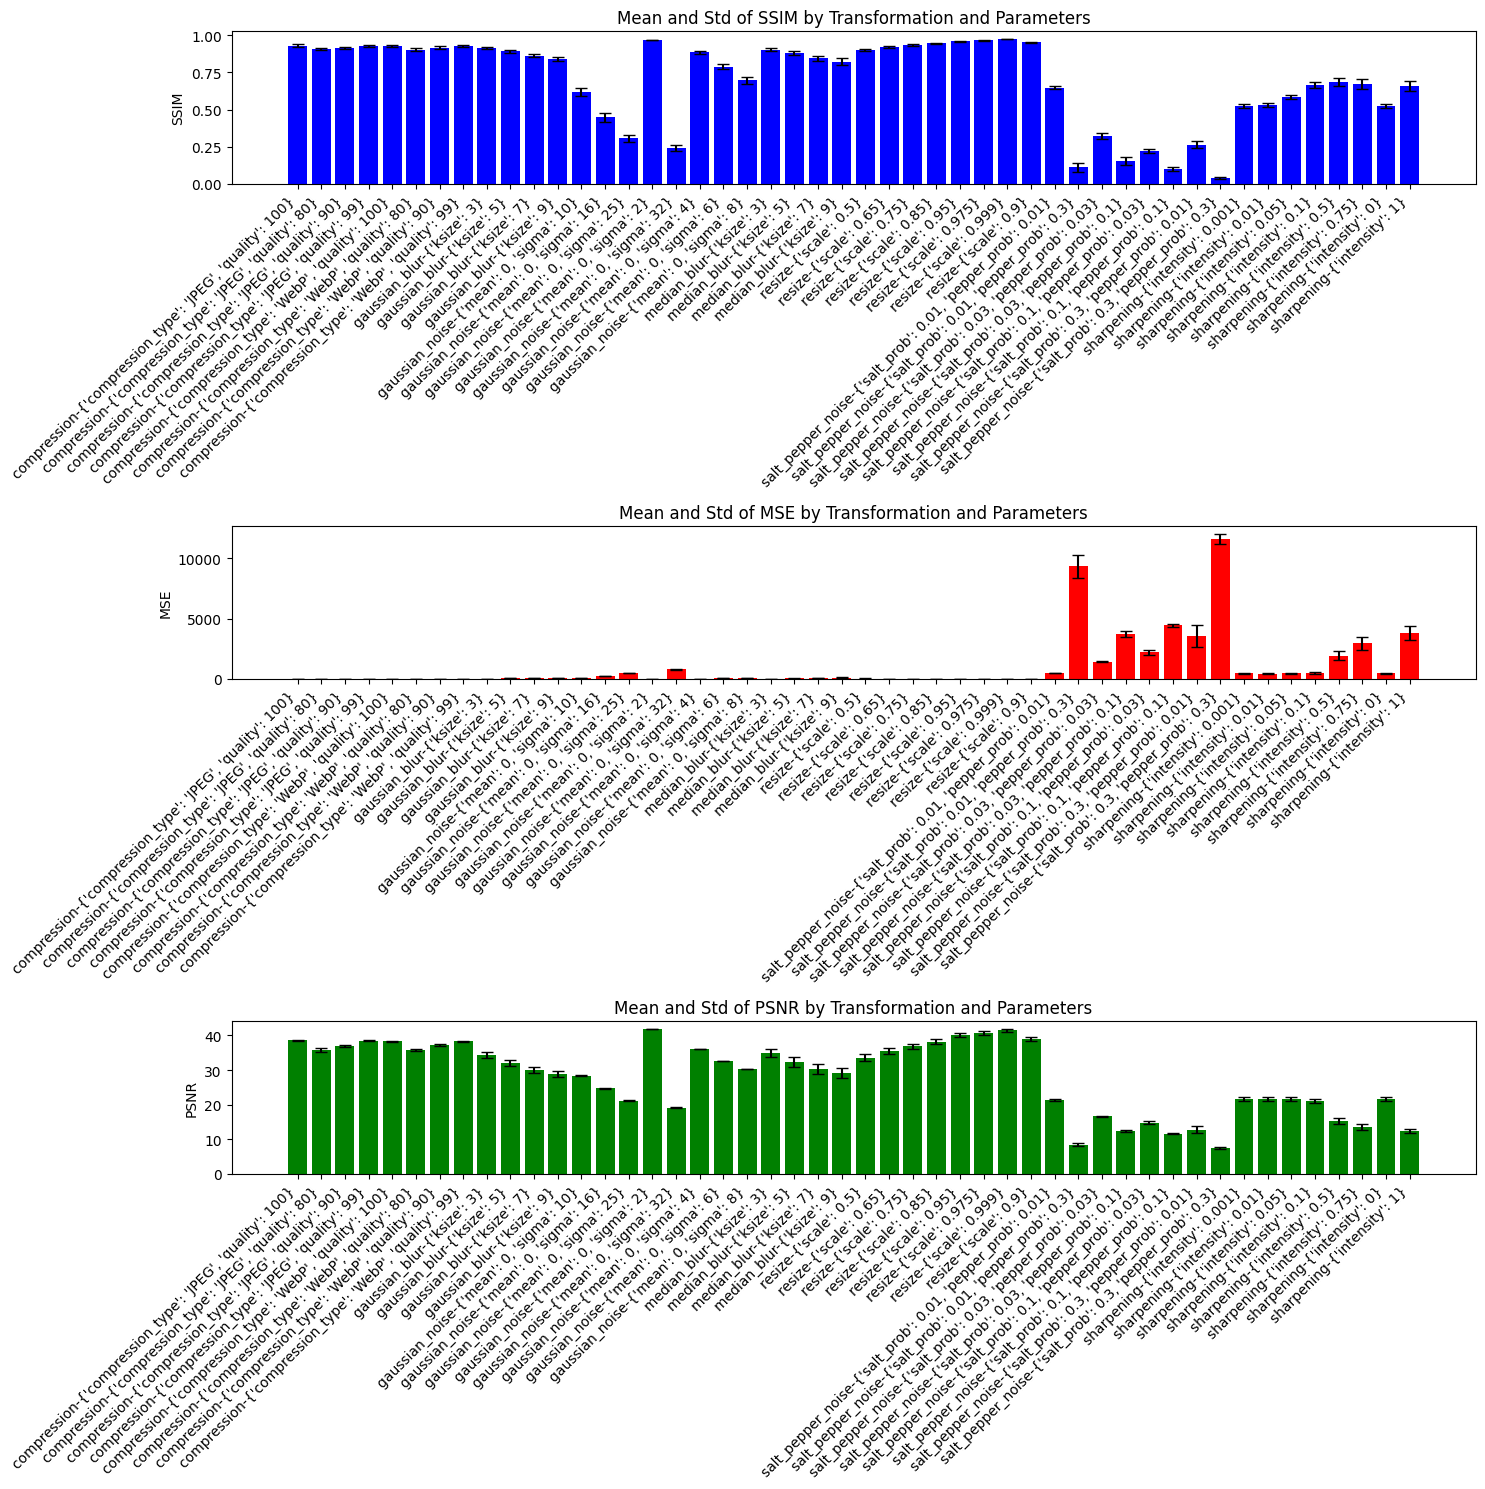

In [43]:
summary_transformations = summary_transformations.reset_index()
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
metrics = ['ssim', 'mse', 'psnr']
titles = ['SSIM', 'MSE', 'PSNR']
colors = ['blue', 'red', 'green']

for i, metric in enumerate(metrics):
    mean_values = summary_transformations[(metric, 'mean')]
    std_values = summary_transformations[(metric, 'std')]
    index_labels = summary_transformations[['transformation', 'parameters']].astype(str).agg('-'.join, axis=1)
    
    axes[i].bar(index_labels, mean_values, yerr=std_values, capsize=4, color=colors[i])
    axes[i].set_title(f'Mean and Std of {titles[i]} by Transformation and Parameters')
    axes[i].set_ylabel(titles[i])
    axes[i].set_xticklabels(index_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Revealing performace (Secret image vs Recovered image)

In [22]:
revealing_baseline = df_revealing[df_revealing['input_image'].str.contains("stego")]  # Filtrar imágenes stego
revealing_transformed = df_revealing[~df_revealing['input_image'].str.contains("stego")]  # Filtrar imágenes transformadas

In [29]:
revealing_transformed['variant'] = revealing_transformed.input_image.apply(lambda x:x.split("/")[-3])
revealing_transformed['parameters'] = revealing_transformed['variant'].map(mapping_dict)

### Baseline (recovered secret from the stego image without transformations)

In [30]:
revealing_baseline[['ssim', 'mse', 'psnr']].agg(['mean', 'std'])

,ssim,mse,psnr
mean,0.939022,97.983799,28.221921
std,0.001522,3.441574,0.151852


### Recovered secret from the transformed stego image

In [31]:
summary_revealing_transformed = revealing_transformed.groupby('parameters')[['ssim', 'mse', 'psnr']].agg(['mean', 'std'])
summary_revealing_transformed

ssim            \
                                                  mean       std   
parameters                                                         
{'compression_type': 'JPEG', 'quality': 100}  0.201024  0.008883   
{'compression_type': 'JPEG', 'quality': 80}   0.214746  0.008945   
{'compression_type': 'JPEG', 'quality': 90}   0.215335  0.010247   
{'compression_type': 'JPEG', 'quality': 99}   0.200109  0.009267   
{'compression_type': 'WebP', 'quality': 100}  0.201685  0.010203   
{'compression_type': 'WebP', 'quality': 80}   0.214814  0.009393   
{'compression_type': 'WebP', 'quality': 90}   0.210905  0.010233   
{'compression_type': 'WebP', 'quality': 99}   0.201255  0.010264   
{'intensity': 0.001}                          0.625106  0.005117   
{'intensity': 0.01}                           0.627123  0.005457   
{'intensity': 0.05}                           0.639105  0.007612   
{'intensity': 0.1}                            0.658867  0.012065   
{'intensity': 0.5}                            0.404207  0.031589   
{'intensity': 0.75}                           0.383044  0.027500   
{'intensity': 0}                              0.625106  0.005117   
{'intensity': 1}                              0.374254  0.026680   
{'ksize': 3}                                  0.241297  0.026283   
{'ksize': 5}                                  0.214554  0.024103   
{'ksize': 7}                                  0.195843  0.036353   
{'ksize': 9}                                  0.190833  0.038453   
{'mean': 0, 'sigma': 10}                      0.207066  0.006375   
{'mean': 0, 'sigma': 16}                      0.123189  0.005886   
{'mean': 0, 'sigma': 25}                      0.075184  0.004623   
{'mean': 0, 'sigma': 2}                       0.641747  0.005954   
{'mean': 0, 'sigma': 32}                      0.056893  0.004711   
{'mean': 0, 'sigma': 4}                       0.461374  0.007023   
{'mean': 0, 'sigma': 6}                       0.341815  0.007350   
{'mean': 0, 'sigma': 8}                       0.261081  0.007423   
{'salt_prob': 0.01, 'pepper_prob': 0.01}      0.661364  0.015101   
{'salt_prob': 0.01, 'pepper_prob': 0.3}       0.207535  0.027127   
{'salt_prob': 0.03, 'pepper_prob': 0.03}      0.444444  0.018939   
{'salt_prob': 0.03, 'pepper_prob': 0.1}       0.306225  0.021224   
{'salt_prob': 0.1, 'pepper_prob': 0.03}       0.329554  0.024562   
{'salt_prob': 0.1, 'pepper_prob': 0.1}        0.234376  0.016332   
{'salt_prob': 0.3, 'pepper_prob': 0.01}       0.277551  0.033389   
{'salt_prob': 0.3, 'pepper_prob': 0.3}        0.104705  0.009547   
{'scale': 0.5}                                0.230995  0.005798   
{'scale': 0.65}                               0.251511  0.005603   
{'scale': 0.75}                               0.285074  0.005242   
{'scale': 0.85}                               0.341104  0.005823   
{'scale': 0.95}                               0.369998  0.002552   
{'scale': 0.975}                              0.435148  0.003175   
{'scale': 0.999}                              0.553885  0.004976   
{'scale': 0.9}                                0.332232  0.004254   

                                                       mse               \
                                                      mean          std   
parameters                                                                
{'compression_type': 'JPEG', 'quality': 100}  14902.429556   260.158228   
{'compression_type': 'JPEG', 'quality': 80}   14106.173137   251.427769   
{'compression_type': 'JPEG', 'quality': 90}   14139.883117   265.292888   
{'compression_type': 'JPEG', 'quality': 99}   14908.684785   260.412345   
{'compression_type': 'WebP', 'quality': 100}  14717.214601   288.932787   
{'compression_type': 'WebP', 'quality': 80}   14132.564982   262.842409   
{'compression_type': 'WebP', 'quality': 90}   14288.049073   282.153220   
{'compression_type': 'WebP', 'quality': 99}   14729.510743   288.858855   
{'intensity': 0.001}        

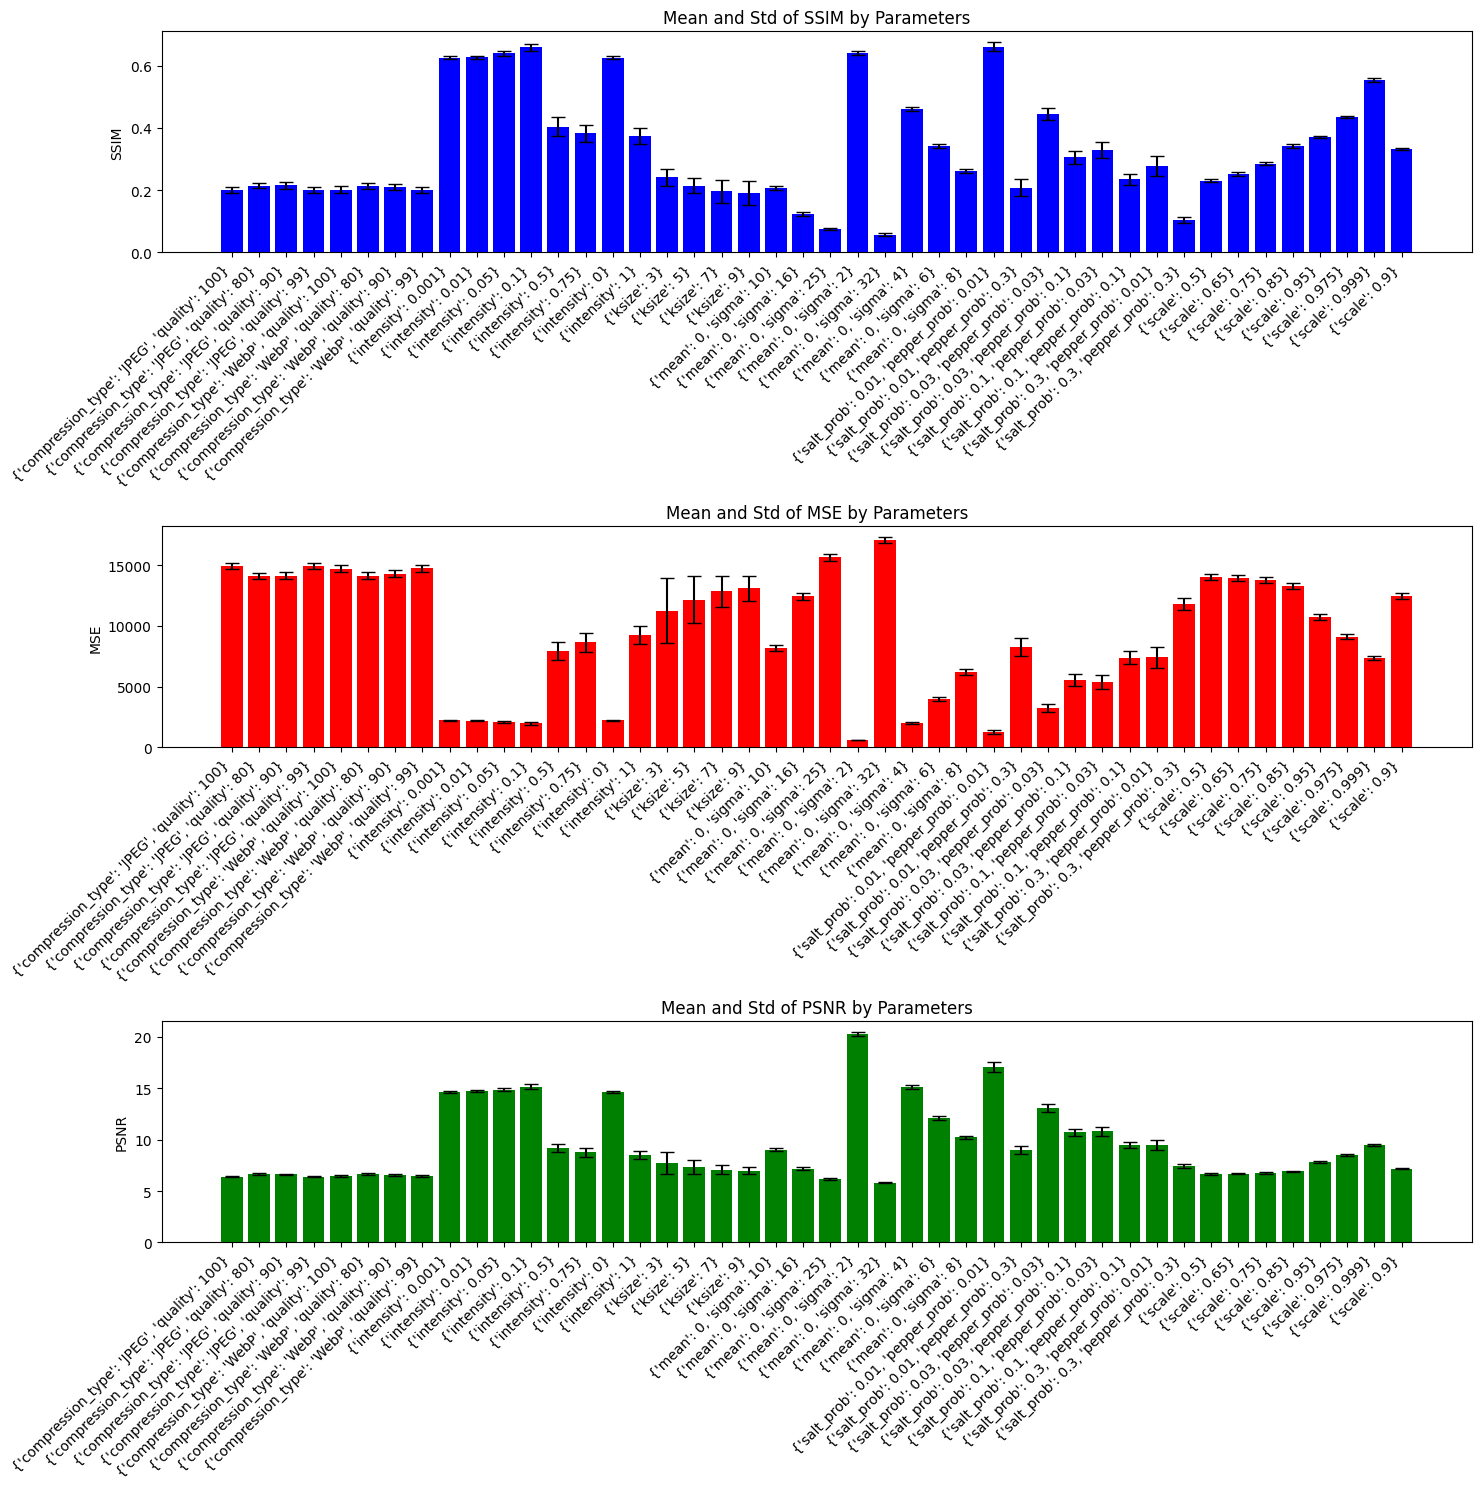

In [36]:
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
metrics = ['ssim', 'mse', 'psnr']
titles = ['SSIM', 'MSE', 'PSNR']
colors = ['blue', 'red', 'green']

for i, metric in enumerate(metrics):
    mean_values = summary_revealing_transformed[(metric, 'mean')]
    std_values = summary_revealing_transformed[(metric, 'std')]
    
    axes[i].bar(mean_values.index.astype(str), mean_values, yerr=std_values, capsize=5, color=colors[i])
    axes[i].set_title(f'Mean and Std of {titles[i]} by Parameters')
    axes[i].set_ylabel(titles[i])
    axes[i].set_xticklabels(mean_values.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()